In [1]:
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import glob
import os
import pytesseract
import cv2

In [2]:
def preprocessing_df(data):
    data = data.iloc[2:]
    data['numero'] = data['numero'].astype('str')
    data['nom_photo_cropped'] = data['numero'] + '.nutrition.cropped.jpg'
    data['nom_info_nutr'] = data['numero'] + '.nutrition.json'
    return data


In [5]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [6]:
# img_test = image_list[4].convert('L')
img_test = Image.open('project final/nutrients.jpg')
# img_test = img_test.point(lambda x: 0 if x<100 else 255, '1')
#print(img_test)
text = pytesseract.image_to_string(img_test)

In [7]:
text

'\x0c'

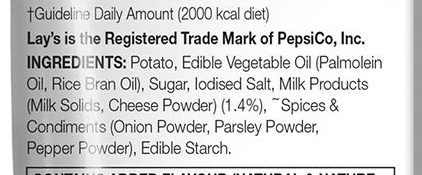

In [8]:
img_test.convert('L')

In [9]:
img = cv2.imread('5.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)

True

In [10]:
import cv2
import numpy as np

img = cv2.imread('5.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('houghlines5.jpg',img)

True

In [13]:
img = cv2.imread('project final/nutrients.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

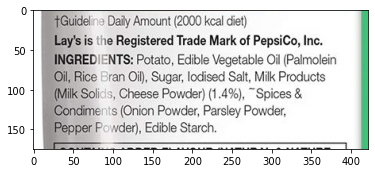

In [14]:
plt.imshow(img)
plt.show()

In [23]:
!pip install vision

  Created wheel for vision: filename=vision-1.0.0-py3-none-any.whl size=2171 sha256=71901a4113b3f22378d195bec1ee43c6f791707b9ad53564072a3f789df7a836
  Stored in directory: c:\users\joyeeta\appdata\local\pip\cache\wheels\d9\c2\60\1cb514cc46678e7f0544033de5bebd7d017778af86b8989b68
Successfully built vision


In [26]:
import vision
import io
def detect_text(path):
    """Detects text in the file."""
  
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))


ModuleNotFoundError: No module named 'vision'

In [ ]:
detect_text('5.png')

In [27]:
!pip install table_ocr

Error processing line 1 of D:\apps\Anaconda\lib\site-packages\vision-1.0.0-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "D:\apps\Anaconda\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
